#Import necessary libraries: Libraries for data manipulation, visualization, and machine learning are imported.

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Loading the car dataset using pandas.

In [6]:

file_path = '/content/car data.csv'  # Replace with your file path
car_data = pd.read_csv(file_path)

# Performed Exploratory Data Analysis (EDA) to Inspect the data, understand its structure, and visualize the distribution of car prices.

First few rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Summary statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882  

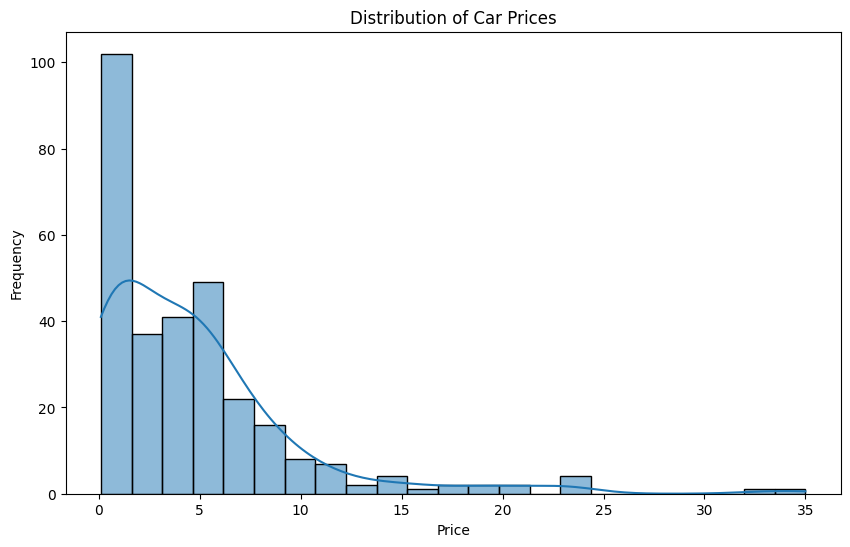

In [7]:

print("First few rows of the dataset:")
print(car_data.head())


print("\nSummary statistics:")
print(car_data.describe())


print("\nDataset info:")
print(car_data.info())


plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#Data Cleaning: Handle missing values and convert categorical variables to numerical using one-hot encoding.

In [8]:
print("\nMissing values:")
print(car_data.isnull().sum())

car_data_cleaned = car_data.dropna()

categorical_cols = car_data_cleaned.select_dtypes(include=['object']).columns
car_data_cleaned = pd.get_dummies(car_data_cleaned, columns=categorical_cols, drop_first=True)


Missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


#Feature Selection and Engineering: Analyzed the correlation matrix and select features for the model.

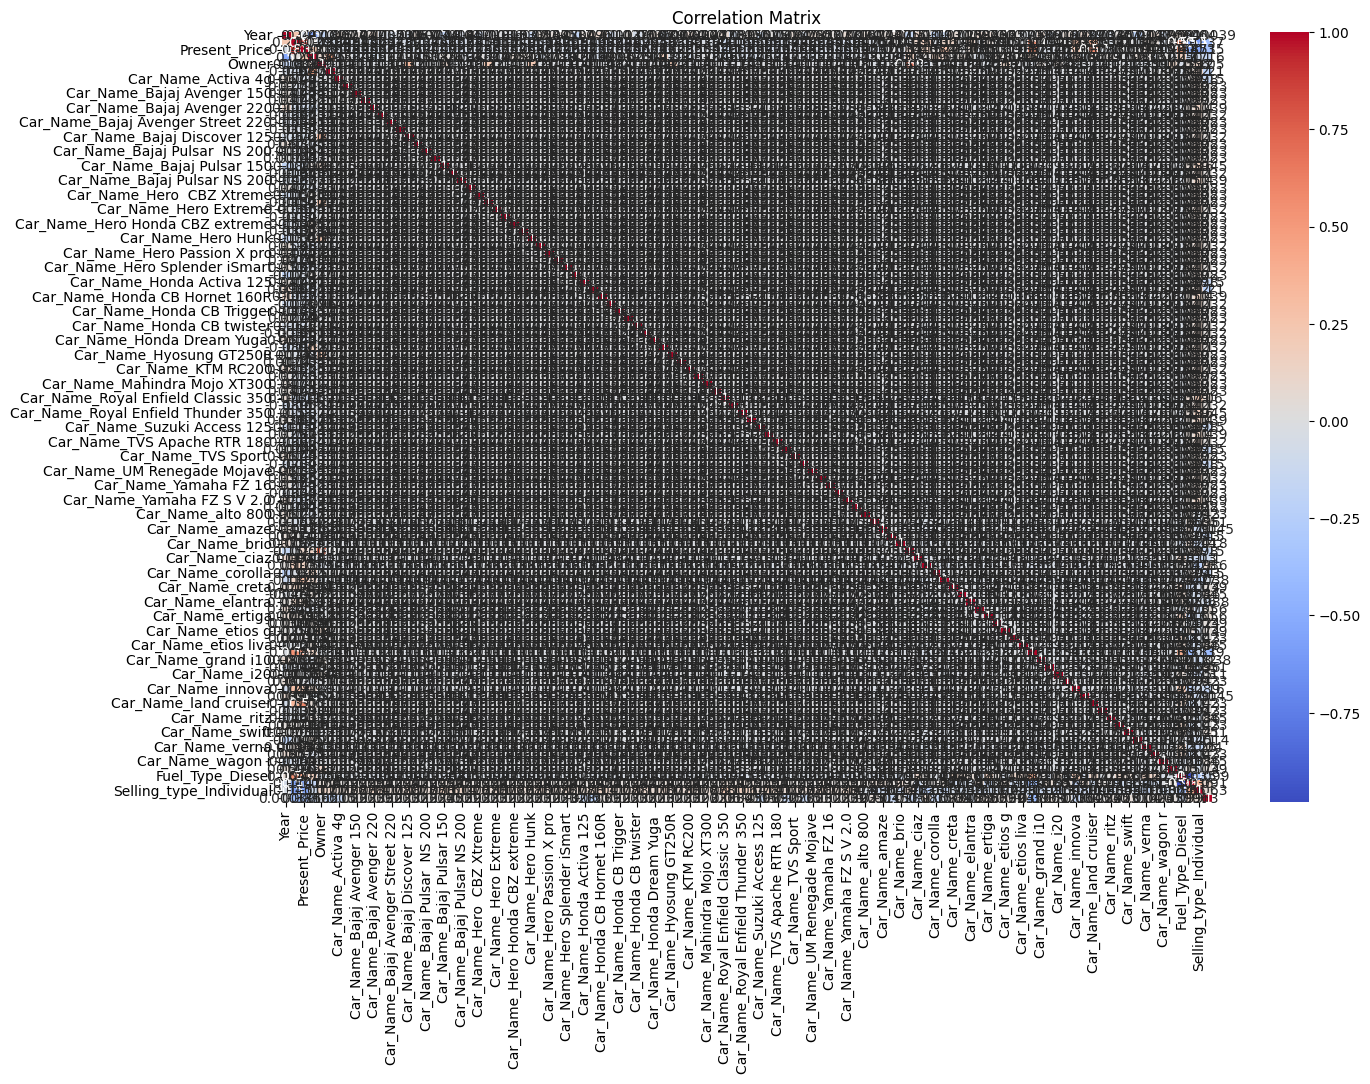

In [9]:

plt.figure(figsize=(15, 10))
sns.heatmap(car_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X = car_data_cleaned.drop('Selling_Price', axis=1)
y = car_data_cleaned['Selling_Price']

#Split the data into training and testing sets for model evaluation.

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training both linear regression model and random forest regressor.

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#Using mean squared error (MSE) and R-squared metrics the performance of the models where evaluated and visualize the results.


Linear Regression Performance:
Mean Squared Error: 1.1551287277465448e+25
R-squared: -5.014540554545434e+23

Random Forest Regressor Performance:
Mean Squared Error: 0.7524023742622952
R-squared: 0.9673373873539192


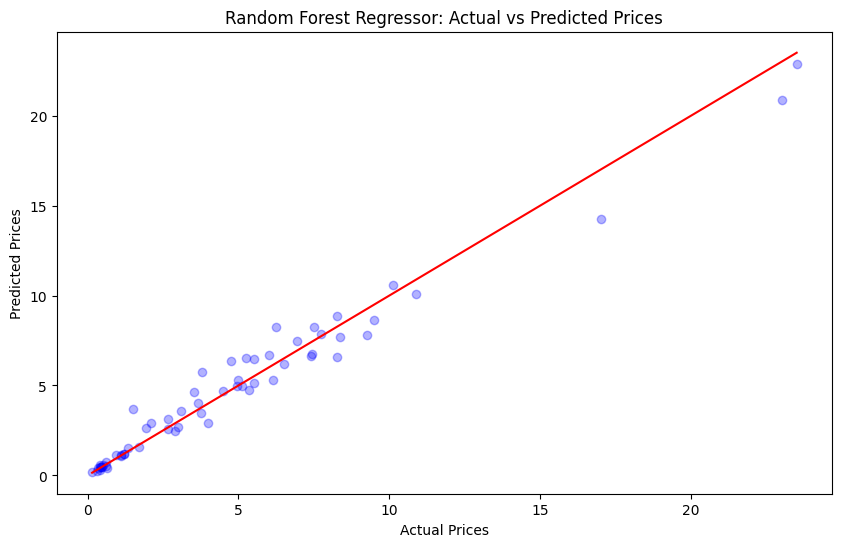

In [12]:
y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("\nLinear Regression Performance:")
print(f"Mean Squared Error: {mse_lin}")
print(f"R-squared: {r2_lin}")


y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Random Forest Regressor: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
